In [219]:
#libraries
import pandas as pd 
import nltk
import csv
from pprint import pprint   
import re
from collections import Counter
import matplotlib.pyplot as plt

In [220]:
#load datset
df = pd.read_csv('clash-of-clans.csv')
df.head()


,Date,Content,Name,Rating
0,2/1/2019,💜💜💜,Tusher shimul,5
1,2/1/2019,Pls make it th13,NaN,3
2,2/1/2019,it is cute,jibon ahmed,5
3,2/1/2019,superb,Sunil Jayasingha,5
4,2/1/2019,"its an awesome game, period",NaN,5


In [221]:
#load content into separate df
content = df.Content

#look at first 5 rows of content
ctr = 0
for row in content:
    if ctr > 5:
        break
    print(row)
    ctr+=1

💜💜💜
Pls make it th13
it is cute
superb
its an awesome game, period
wow


In [222]:
#separate words by comma
tokens = []
for row in content:
    row = str(row)
    words = row.split(' ')
    tokens += words


In [223]:
#look at first 10 tookens
tokens[:10]

['💜💜💜', 'Pls', 'make', 'it', 'th13', 'it', 'is', 'cute', 'superb', 'its']

In [224]:
#normalize tokens
norrmalized_tokens = [re.sub(r'\W+', '', token.lower()) for token in tokens]

In [225]:
#look at length of normalized_tokens
len(norrmalized_tokens)

354316

In [226]:
norrmalized_tokens[:20]

['',
 'pls',
 'make',
 'it',
 'th13',
 'it',
 'is',
 'cute',
 'superb',
 'its',
 'an',
 'awesome',
 'game',
 'period',
 'wow',
 'nice',
 'game',
 'and',
 'nice',
 'army']

In [227]:
from nltk.corpus import stopwords
#download stopwords from nltk
nltk.download('stopwords')

#set stopwords to english
all_stopwords = set(stopwords.words('english'))

#remove stopwords
norrmalized_tokens = [norrmalized_tokens for norrmalized_tokens in norrmalized_tokens if norrmalized_tokens not in all_stopwords]

#look at length after stopwords removed
len(norrmalized_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nagem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


212456

In [228]:
norrmalized_tokens[:5]

['', 'pls', 'make', 'th13', 'cute']

In [229]:
#number of unique tokens
len(pd.unique(norrmalized_tokens))

19088

# Frequency Distribution

In [230]:
#look at frequency distribution
fdist = nltk.FreqDist(norrmalized_tokens)
print(fdist.most_common(10))

[('game', 27911), ('good', 8123), ('nice', 6592), ('best', 5268), ('love', 4303), ('', 4145), ('like', 2812), ('play', 2309), ('time', 2069), ('super', 1932)]


(0.0, 100.0)

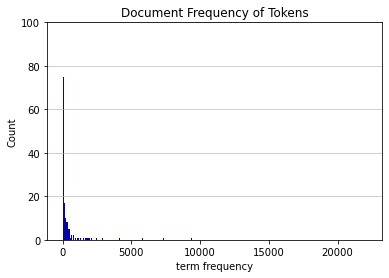

In [232]:
#Plot frequency distribution of tokens
n, bins, patches = plt.hist(x=list(df_dict.values()), bins=1000, color="#0504aa")
plt.grid(axis="y", alpha=0.75)
plt.xlabel("term frequency")
plt.ylabel("Count")
plt.title("Document Frequency of Tokens")
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=100)

# Term frequency & Document frequency

This portion starts from the content dataframe again before the other normalization steps were completed.

In [231]:
#create dictionary to count term frequency and document frequency
tf_dict = {} #term frequency
df_dict = (
    Counter()
) #for document frequency

for idx, tokens in enumerate(content):
    tf_dict[idx] = Counter()
    tokens = str(tokens)
    tokens = tokens.split(' ')
    for token in tokens:
        token = token.lower()
        if token not in df_dict:
            df_dict[token] = 1
        if token in tf_dict[idx]:
            tf_dict[idx][token] += 1
        else:
            tf_dict[idx][token] = 1
            df_dict[token] += 1

# Stemming

In [233]:
print('Dictionary length: {}'.format(len(df_dict)))

Dictionary length: 26746


In [234]:
#look at the 20 most common words
df_dict.most_common(20)

[('game', 22131),
 ('i', 9368),
 ('is', 8779),
 ('this', 8081),
 ('good', 7606),
 ('it', 7334),
 ('nice', 6295),
 ('very', 6079),
 ('the', 5813),
 ('and', 5219),
 ('best', 4936),
 ('a', 4405),
 ('love', 4151),
 ('to', 3949),
 ('of', 3309),
 ('in', 3098),
 ('my', 2990),
 ('but', 2916),
 ('like', 2599),
 ('for', 2468)]

In [235]:
#create a dictionary without stopwords
df_dict_wo_stopwords = {}
for key in df_dict.keys():
    if key not in all_stopwords:
        df_dict_wo_stopwords[key] = df_dict[key]

In [236]:
#Look at length of df_dict_wo_stopwords
print('Length of document frequency with stopwords removed:  {}'.format(len(df_dict_wo_stopwords)))

Length of document frequency with stopwords removed:  26595


(0.0, 100.0)

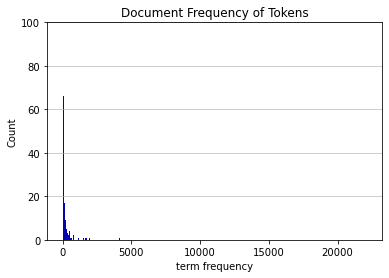

In [237]:
#Plot frequency distribution of tokens after removing stopwords
n, bins, patches = plt.hist(x=list(df_dict_wo_stopwords.values()), bins=1000, color="#0504aa")
plt.grid(axis="y", alpha=0.75)
plt.xlabel("term frequency")
plt.ylabel("Count")
plt.title("Document Frequency of Tokens")
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=100)

In [238]:
#look at format of term frequency
for x in range(5):
    print(tf_dict[x])

Counter({'💜💜💜': 1})
Counter({'pls': 1, 'make': 1, 'it': 1, 'th13': 1})
Counter({'it': 1, 'is': 1, 'cute': 1})
Counter({'superb': 1})
Counter({'its': 1, 'an': 1, 'awesome': 1, 'game,': 1, 'period': 1})
